# Based on the data collected from UCI's open source datasets, we will prepare a model and test that model using Machine Learning algorithms to predict the possibility of a heart ailment in a patient.

In [56]:
#Importing Packages
import numpy as np               

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns




#Warnings
import warnings
warnings.filterwarnings("ignore")

In [57]:
heart = pd.read_csv("C:\\heart.csv")

In [58]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## Attribute Information: 
> 1.  age 
> 2.  sex 
> 3.  cp       : chest pain type (4 values) 
> 4.  trestbps : resting blood pressure 
> 5.  chol     : serum cholestoral in mg/dl 
> 6.  fbs      : fasting blood sugar > 120 mg/dl
> 7.  restecg  : resting electrocardiographic results (values 0,1,2)
> 8.  thalach  : maximum heart rate achieved 
> 9.  exang    : exercise induced angina 
> 10. oldpeak  : ST depression induced by exercise relative to rest 
> 11. slope    : the slope of the peak exercise ST segment 
> 12. ca       : number of major vessels (0-3) colored by flourosopy 
> 13. thal     :   
                    3 = normal; 
                    6 = fixed defect; 
                    7 = reversable defect;

> 14. target    :  
                    0 = Not Affected
                    1 = Affected 

In [60]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# Phase_1 : EDA or Exploratory Data Analysis

## Age groups studied :

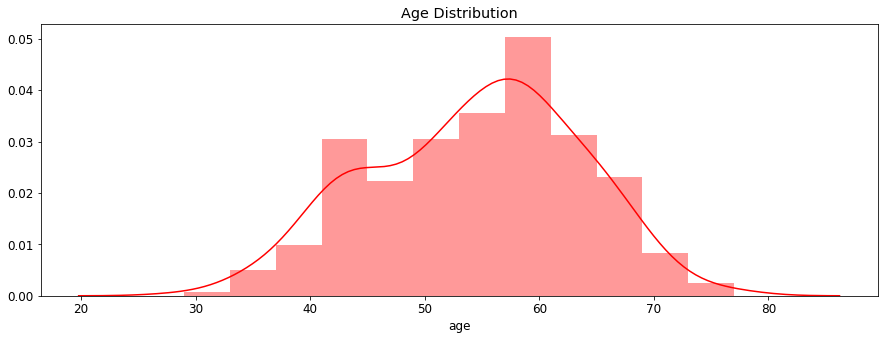

In [61]:
plt.figure(figsize=(15,5))

plt.rcParams.update({"font.size":12})

sns.distplot(heart["age"],color="red")

plt.title("Age Distribution")

plt.show()

## Let's see if any of the attributes correlate with each other. Correlation heatmaps and pairplots are the perfect for this purpose.

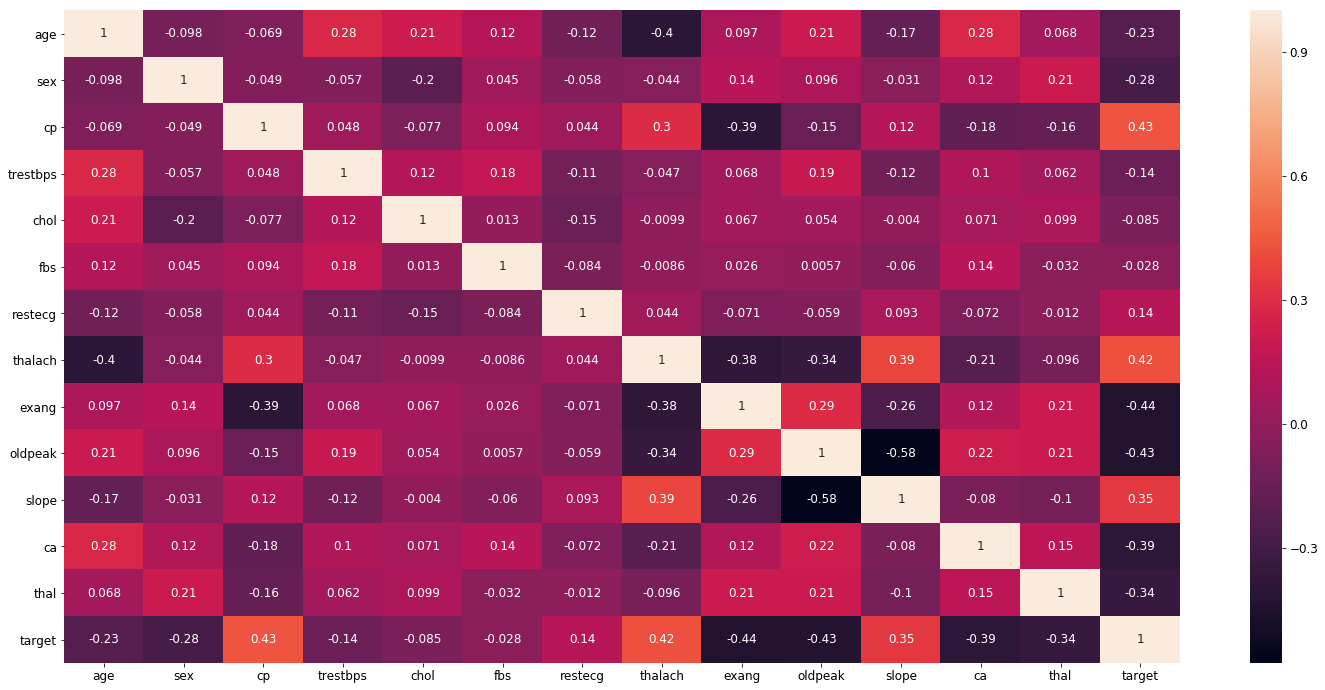

In [62]:
plt.figure(figsize=(25,12))

plt.rcParams.update({"font.size":12})

sns.heatmap(data = heart.corr(),
            annot = True)

plt.show()

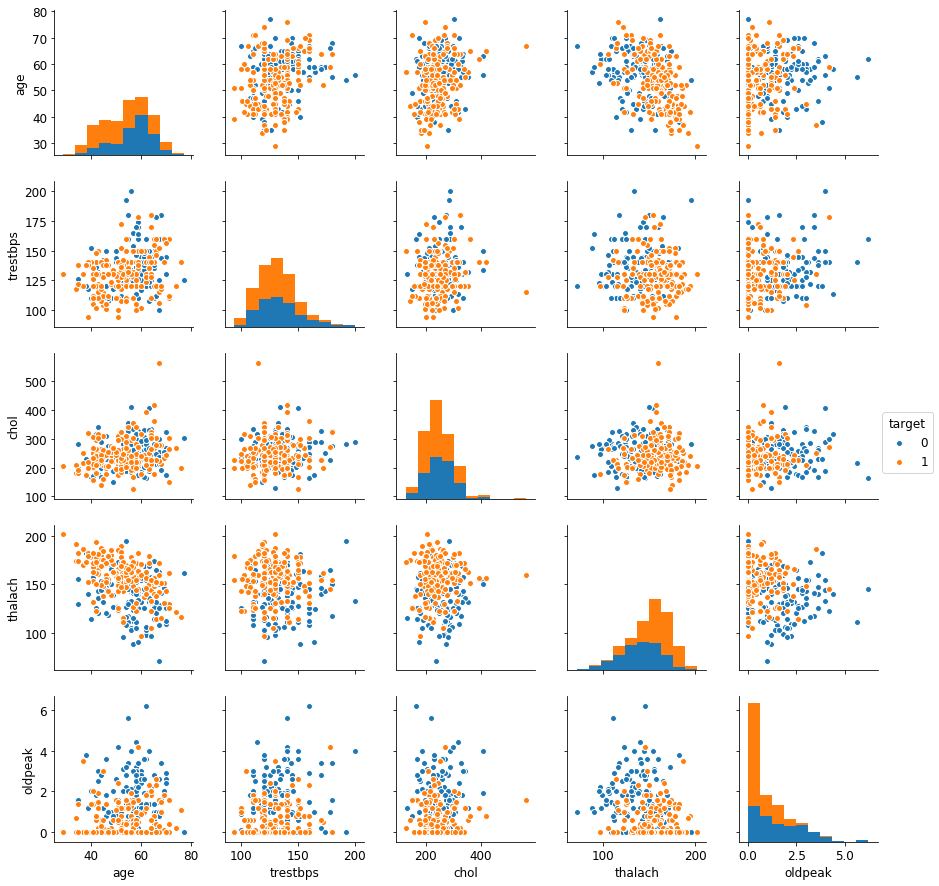

In [63]:
plt.rcParams.update({"font.size":12})

sns.pairplot(data=heart,
            vars=['age' , 'trestbps' , 'chol' , 'thalach' , 'oldpeak'],
            hue="target")

plt.show()

## There seems to be some kind of a relationship between age and trestbps.  Let us observe this from a jointplot.

<Figure size 1440x720 with 0 Axes>

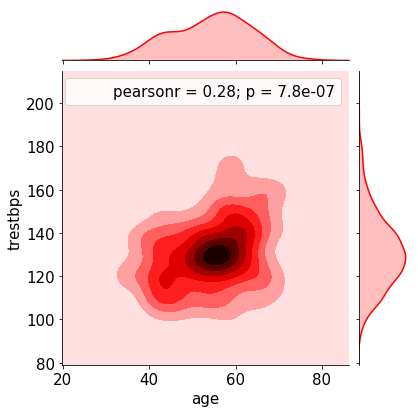

In [64]:
plt.figure(figsize=(20,10))

plt.rcParams.update({"font.size":15})

sns.jointplot(data = heart,
             x="age",
             y="trestbps",
             kind='kde',
             color="r")

plt.show()

# Phase_2 : Using Machine Learning models to predict the occurrence of Heart disease based on the given data. The 'Accuracy Score' obtained in each model, indicates the possibility of occurrence of a heart ailment.

## Test -> Train -> Split Data

In [65]:
X = heart[['age','sex','cp','thalach','exang','oldpeak','slope','ca','thal']]

y = heart["target"]

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 2.1 : Logistic Regression

Classification_Report : 
             precision    recall  f1-score   support

          0       0.92      0.88      0.90        26
          1       0.92      0.94      0.93        35

avg / total       0.92      0.92      0.92        61



Accuracy Score = 91.8 %


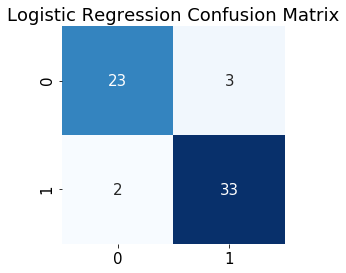

In [68]:
from sklearn.linear_model import LogisticRegression

reg_1 = LogisticRegression()

reg_1.fit(X_train,y_train)

pred_1 = reg_1.predict(X_test)

print("Classification_Report : ")
print(classification_report(y_test,pred_1))
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test,pred_1)*100,2))+" %")


plt.figure(figsize=(4,4))

plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.title("Logistic Regression Confusion Matrix")

sns.heatmap(confusion_matrix(y_test,pred_1),annot=True,cmap="Blues",cbar=False)

plt.show()

## 2.2 : Support Vector Machines

Classification_Report : 
             precision    recall  f1-score   support

          0       0.65      0.50      0.57        26
          1       0.68      0.80      0.74        35

avg / total       0.67      0.67      0.66        61



Accuracy Score = 67.21 %


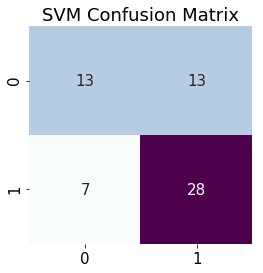

In [69]:
from sklearn.svm import SVC

sv_2 = SVC()

sv_2.fit(X_train, y_train)

pred_2 = sv_2.predict(X_test)

print("Classification_Report : ")
print(classification_report(y_test,pred_2))
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test,pred_2)*100,2))+" %")

plt.figure(figsize=(4,4))

plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.title("SVM Confusion Matrix")

sns.heatmap(confusion_matrix(y_test,pred_2),annot=True,cmap="BuPu",cbar=False)

plt.show()

## 2.3 : Random Forest Classifier

Classification_Report : 
             precision    recall  f1-score   support

          0       0.92      0.85      0.88        26
          1       0.89      0.94      0.92        35

avg / total       0.90      0.90      0.90        61



Accuracy Score = 90.16 %


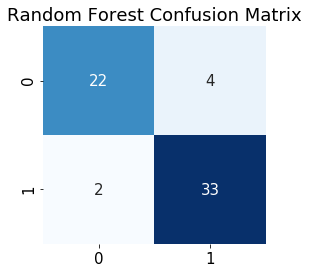

In [70]:
from sklearn.ensemble import RandomForestClassifier

rfc_3 = RandomForestClassifier()

rfc_3.fit(X_train, y_train)

pred_3 = rfc_3.predict(X_test)

print("Classification_Report : ")
print(classification_report(y_test,pred_3))
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test,pred_3)*100,2))+" %")


plt.figure(figsize=(4,4))

plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.title("Random Forest Confusion Matrix")

sns.heatmap(confusion_matrix(y_test,pred_3),annot=True,cmap="Blues",cbar=False)

plt.show()

## 2.4 : K Nearest Neighbors

Classification_Report : 
             precision    recall  f1-score   support

          0       0.76      0.62      0.68        26
          1       0.75      0.86      0.80        35

avg / total       0.76      0.75      0.75        61



Accuracy Score = 75.41 %


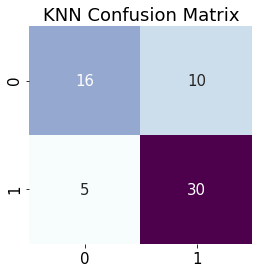

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knc_4 = KNeighborsClassifier()

knc_4.fit(X_train,y_train)

pred_4 = knc_4.predict(X_test)

print("Classification_Report : ")
print(classification_report(y_test,pred_4))
print("\n")

print("Accuracy Score = "+str(round(accuracy_score(y_test,pred_4)*100,2))+" %")

plt.figure(figsize=(4,4))

plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.title("KNN Confusion Matrix")

sns.heatmap(confusion_matrix(y_test,pred_4),annot=True,cmap="BuPu",cbar=False)

plt.show()

## 2.5 : AdaBoost Classifier

Classification_Report : 
             precision    recall  f1-score   support

          0       0.96      0.88      0.92        26
          1       0.92      0.97      0.94        35

avg / total       0.94      0.93      0.93        61



Accuracy Score = 93.44 %


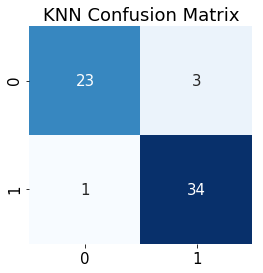

In [72]:
from sklearn.ensemble import AdaBoostClassifier

abc_5 = AdaBoostClassifier()

abc_5.fit(X_train,y_train)

pred_5 = abc_5.predict(X_test)

print("Classification_Report : ")
print(classification_report(y_test,pred_5))
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test,pred_5)*100,2))+" %")

plt.figure(figsize=(4,4))

plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.title("KNN Confusion Matrix")

sns.heatmap(confusion_matrix(y_test,pred_5),annot=True,cmap="Blues",cbar=False)

plt.show()

## 2.6 : Naive Bayes Classifier

Classification_Report : 
             precision    recall  f1-score   support

          0       0.92      0.88      0.90        26
          1       0.92      0.94      0.93        35

avg / total       0.92      0.92      0.92        61



Accuracy Score = 91.8 %


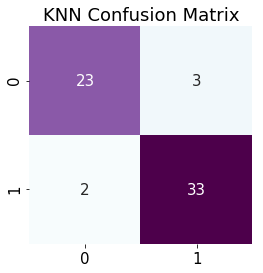

In [73]:
from sklearn.naive_bayes import GaussianNB

gnb_6 = GaussianNB()

gnb_6.fit(X_train, y_train)

pred_6 = gnb_6.predict(X_test)

print("Classification_Report : ")
print(classification_report(y_test,pred_6))
print("\n")
print("Accuracy Score = "+str(round(accuracy_score(y_test,pred_6)*100,2))+" %")

plt.figure(figsize=(4,4))

plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.title("KNN Confusion Matrix")

sns.heatmap(confusion_matrix(y_test,pred_6),annot=True,cmap="BuPu",cbar=False)

plt.show()

## 2.7 : Decision Tree Algorithm

Classification_Report : 
             precision    recall  f1-score   support

          0       0.80      0.62      0.70        26
          1       0.76      0.89      0.82        35

avg / total       0.77      0.77      0.76        61



Accuracy Score = 77.05 %


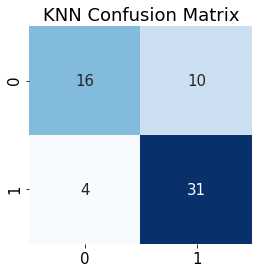

In [74]:
from sklearn.tree import DecisionTreeClassifier

dtclass_7 = DecisionTreeClassifier()

dtclass_7.fit(X_train, y_train)

pred_7 = dtclass_7.predict(X_test)

print("Classification_Report : ")
print(classification_report(y_test,pred_7))
print("\n")

print("Accuracy Score = "+str(round(accuracy_score(y_test,pred_7)*100,2))+" %")

plt.figure(figsize=(4,4))

plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.title("KNN Confusion Matrix")

sns.heatmap(confusion_matrix(y_test,pred_7),annot=True,cmap="Blues",cbar=False)

plt.show()

# To Summarize :

In [76]:
summary = pd.DataFrame({"Model_Used" : ["LogisticRegression","SVC","RandomForest","KNN","AdaBoostClassifier","NaiveBayesClass",
                                       "DecisionTreeAlgorithm"],
                       "Accuracy_Score (in %)": [round(accuracy_score(y_test,pred_1)*100,2),
                                         round(accuracy_score(y_test,pred_2)*100,2),
                                         round(accuracy_score(y_test,pred_3)*100,2),
                                         round(accuracy_score(y_test,pred_4)*100,2),
                                         round(accuracy_score(y_test,pred_5)*100,2),
                                         round(accuracy_score(y_test,pred_6)*100,2),
                                         round(accuracy_score(y_test,pred_7)*100,2)]})
summary

,Model_Used,Accuracy_Score (in %)
0,LogisticRegression,91.80
1,SVC,67.21
2,RandomForest,90.16
3,KNN,75.41
4,AdaBoostClassifier,93.44
5,NaiveBayesClass,91.80
6,DecisionTreeAlgorithm,77.05
